In [1]:
import pandas as pd
import joblib

# Récupération des données vectorisées à l'aide de TFIDF  dans la partie précédente.
X_train = joblib.load("X_train_final_tfidf.pkl")
y_train = joblib.load("y_train_final.pkl")
X_test = joblib.load("X_test_vec.pkl")
y_test = joblib.load("y_test.pkl")
vectorizer = joblib.load("tfidf_vectorizer.pkl")

C:\Anaconda\Lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator TfidfTransformer from version 1.3.2 when using version 1.5.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:\Anaconda\Lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator TfidfVectorizer from version 1.3.2 when using version 1.5.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [2]:
# Import Metrics
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.metrics import f1_score

# Import pour les matrices de confusion
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Création du dossier où enregistrer les modèles
import os
os.makedirs("Models", exist_ok=True)

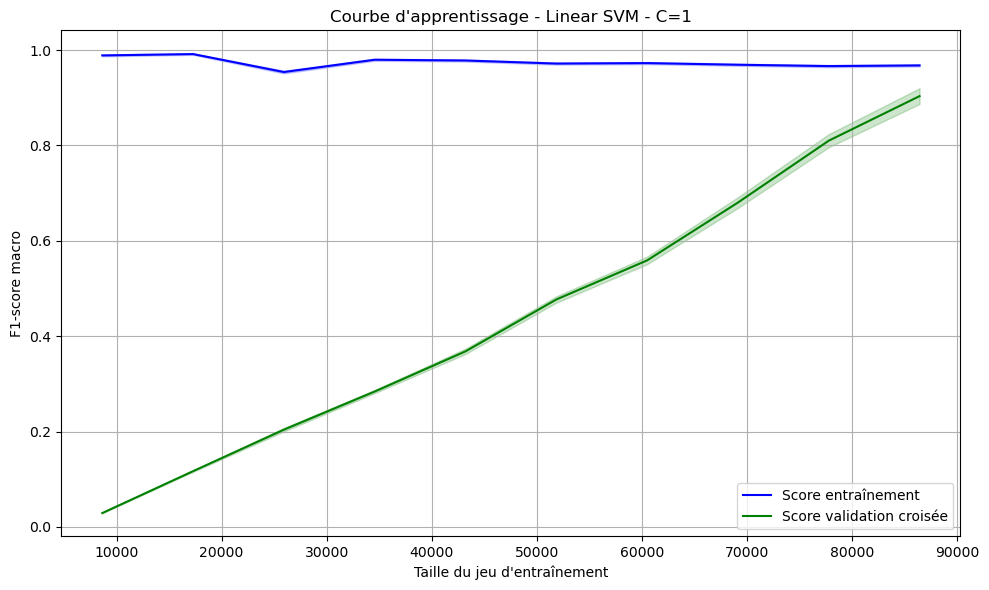

In [3]:
# SVM avec Kernel = Linear

# Courbe d'apprentissage 

from sklearn.model_selection import learning_curve, StratifiedKFold
from sklearn.svm import SVC

train_sizes, train_scores, val_scores = learning_curve(
    SVC(C=1, kernel='linear', probability=True, random_state=25),
    X_train,
    y_train,
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=25),
    scoring='f1_macro',
    train_sizes=np.linspace(0.1, 1.0, 10),
    n_jobs=-1
)

# Moyennes et écarts types
train_scores_mean = train_scores.mean(axis=1)
train_scores_std = train_scores.std(axis=1)
val_scores_mean = val_scores.mean(axis=1)
val_scores_std = val_scores.std(axis=1)

# Graphique
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label="Score entraînement", color="blue")
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.2, color="blue")
plt.plot(train_sizes, val_scores_mean, label="Score validation croisée", color="green")
plt.fill_between(train_sizes, val_scores_mean - val_scores_std, val_scores_mean + val_scores_std, alpha=0.2, color="green")

plt.title("Courbe d'apprentissage - Linear SVM - C=1")
plt.xlabel("Taille du jeu d'entraînement")
plt.ylabel("F1-score macro")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [4]:
# Sauvegarde des données d'apprentissage 
np.savez("Models/courbe_apprentissage_svm.npz",
         train_sizes=train_sizes,
         train_scores=train_scores,
         val_scores=val_scores)

# Sauvegarde de l'image de la courbe
plt.savefig("Models/courbe_apprentissage_svm.png", dpi=300)

<Figure size 640x480 with 0 Axes>

In [5]:
svm2_model = SVC(C=1, kernel='linear', probability=True, random_state=25)
svm2_model.fit(X_train, y_train)

# Prédiction
y_pred_svm2 = svm2_model.predict(X_test)

# Évaluation
report_svm2 = classification_report(y_test, y_pred_svm2, output_dict=True)
print("Accuracy du modèle SVM :", accuracy_score(y_test, y_pred_svm2))
print("\nClassification Report SVM :\n", classification_report(y_test, y_pred_svm2))

import os
os.makedirs("Rapport", exist_ok=True) 

# Enregistrement du rapport de classification
import json
with open("Rapport/classification_report_svm2.json", "w") as f:
    json.dump(report_svm2, f, indent=4)

# Score
acc_svm2 = accuracy_score(y_test, y_pred_svm2)
f1_svm2 = report_svm2["macro avg"]["f1-score"]

# Enregistrement du modèle
joblib.dump(svm2_model, "Models/svm2.pkl")
np.save("Predictions/y_pred_svm2.npy", y_pred_svm2)

Accuracy du modèle SVM : 0.8168904339486933

Classification Report SVM :
               precision    recall  f1-score   support

          10       0.37      0.63      0.47       623
          40       0.71      0.67      0.69       496
          50       0.79      0.79      0.79       329
          60       0.88      0.87      0.87       163
        1140       0.79      0.81      0.80       533
        1160       0.93      0.93      0.93       790
        1180       0.75      0.60      0.67       153
        1280       0.73      0.67      0.70       969
        1281       0.57      0.57      0.57       408
        1300       0.96      0.93      0.94      1001
        1301       0.96      0.90      0.93       139
        1302       0.81      0.82      0.82       475
        1320       0.84      0.82      0.83       645
        1560       0.84      0.81      0.82      1000
        1920       0.87      0.94      0.90       816
        1940       0.87      0.88      0.88       160
       

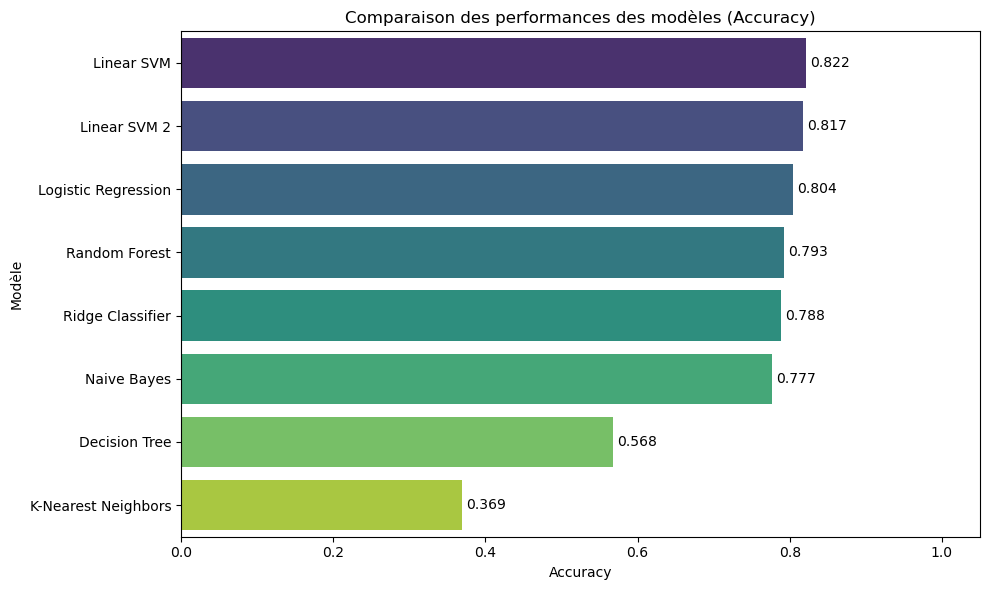

In [6]:
### GRAPHIQUE COMPARATIF DES SCORES (ACCURACY) DIFFERENTS MODELES

import numpy as np

# Nom des modèles
model_names = [
    "K-Nearest Neighbors",
    "Decision Tree",
    "Naive Bayes",
    "Logistic Regression",
    "Random Forest",
    "Ridge Classifier",
    "Linear SVM",
    "Linear SVM 2"
]

# Chargement des prédictions
y_pred_knn = np.load("Predictions/y_pred_knn.npy")
y_pred_tree = np.load("Predictions/y_pred_tree.npy")
y_pred_nb = np.load("Predictions/y_pred_nb.npy")
y_pred_lr = np.load("Predictions/y_pred_lr.npy")
y_pred_rf = np.load("Predictions/y_pred_rf.npy")
y_pred_rdg = np.load("Predictions/y_pred_rdg.npy")
y_pred_svm = np.load("Predictions/y_pred_svm.npy")
y_pred_svm2 = np.load("Predictions/y_pred_svm2.npy")

# Accuracy 
acc_knn = accuracy_score(y_test, y_pred_knn)
acc_tree = accuracy_score(y_test, y_pred_tree)
acc_nb = accuracy_score(y_test, y_pred_nb)
acc_lr = accuracy_score(y_test, y_pred_lr)
acc_rf = accuracy_score(y_test, y_pred_rf)
acc_rdg = accuracy_score(y_test, y_pred_rdg)
acc_svm = accuracy_score(y_test, y_pred_svm)
acc_svm2 = accuracy_score(y_test, y_pred_svm2)

accuracies = [
    acc_knn,
    acc_tree,
    acc_nb,
    acc_lr,
    acc_rf,
    acc_rdg,
    acc_svm,
    acc_svm2
]

results_df = pd.DataFrame({
    "Modèle": model_names,
    "Accuracy": accuracies
}).sort_values(by="Accuracy", ascending=False)


# Graphique
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=results_df, x="Accuracy", y="Modèle", hue="Modèle", palette="viridis", dodge=False, legend=False)
for container in ax.containers:
    ax.bar_label(container, fmt='%.3f', label_type='edge', padding=3)

plt.title("Comparaison des performances des modèles (Accuracy)")
plt.xlabel("Accuracy")
plt.ylabel("Modèle")
plt.xlim(0, 1.05)
plt.tight_layout()
plt.show()

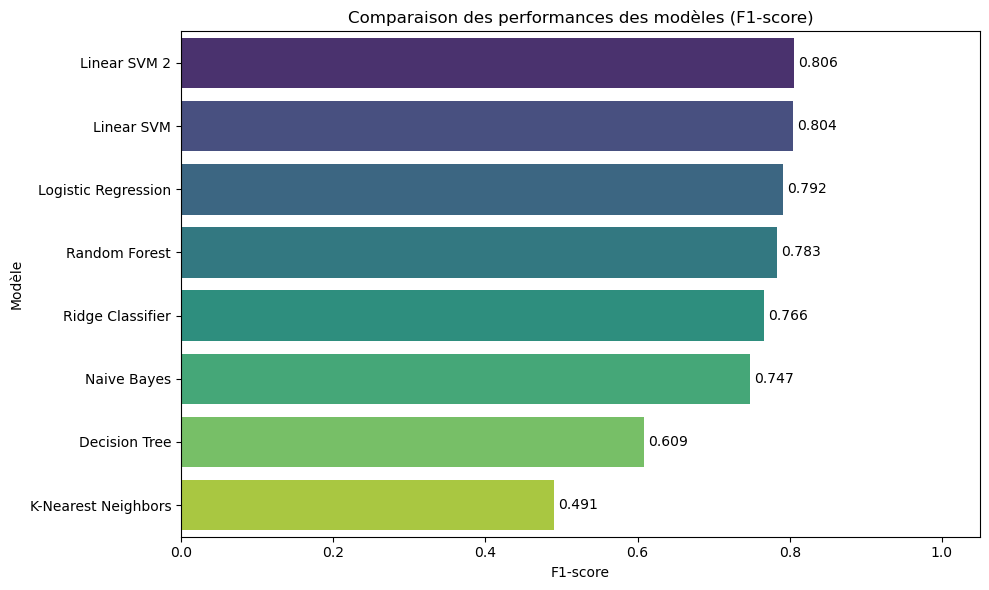

In [7]:
# GRAPHIQUE COMPARATIF DES F1-SCORES DES DIFFERENTS MODELES

# Nom des modèles
model_names = [
    "K-Nearest Neighbors",
    "Decision Tree",
    "Naive Bayes",
    "Logistic Regression",
    "Random Forest",
    "Ridge Classifier",
    "Linear SVM",
    "Linear SVM 2"
]

# Chargement des prédictions
y_pred_knn = np.load("Predictions/y_pred_knn.npy")
y_pred_tree = np.load("Predictions/y_pred_tree.npy")
y_pred_nb = np.load("Predictions/y_pred_nb.npy")
y_pred_lr = np.load("Predictions/y_pred_lr.npy")
y_pred_rf = np.load("Predictions/y_pred_rf.npy")
y_pred_rdg = np.load("Predictions/y_pred_rdg.npy")
y_pred_svm = np.load("Predictions/y_pred_svm.npy")
y_pred_svm2 = np.load("Predictions/y_pred_svm2.npy")

# Rapports
report_knn = classification_report(y_test, y_pred_knn, output_dict=True)
report_tree = classification_report(y_test, y_pred_tree, output_dict=True)
report_nb = classification_report(y_test, y_pred_nb, output_dict=True)
report_lr = classification_report(y_test, y_pred_lr, output_dict=True)
report_rf = classification_report(y_test, y_pred_rf, output_dict=True)
report_rdg = classification_report(y_test, y_pred_rdg, output_dict=True)
report_svm = classification_report(y_test, y_pred_svm, output_dict=True)
report_svm2 = classification_report(y_test, y_pred_svm2, output_dict=True)

# F1 scores
f1_knn = report_knn["macro avg"]["f1-score"]
f1_tree = report_tree["macro avg"]["f1-score"]
f1_nb = report_nb["macro avg"]["f1-score"]
f1_lr= report_lr["macro avg"]["f1-score"]
f1_rf = report_rf["macro avg"]["f1-score"]
f1_rdg = report_rdg["macro avg"]["f1-score"]
f1_svm = report_svm["macro avg"]["f1-score"]
f1_svm2 = report_svm2["macro avg"]["f1-score"]

f1_scores = [
    f1_knn,
    f1_tree,
    f1_nb,
    f1_lr,
    f1_rf,
    f1_rdg,
    f1_svm,
    f1_svm2
]

f1_df = pd.DataFrame({
    "Modèle": model_names,
    "F1_avg": f1_scores
}).sort_values(by="F1_avg", ascending=False)


# Graphique
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=f1_df, x="F1_avg", y="Modèle", hue="Modèle", palette="viridis", dodge=False, legend=False)
for container in ax.containers:
    ax.bar_label(container, fmt='%.3f', label_type='edge', padding=3)

plt.title("Comparaison des performances des modèles (F1-score)")
plt.xlabel("F1-score")
plt.ylabel("Modèle")
plt.xlim(0, 1.05)
plt.tight_layout()
plt.show()
